In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Preparing Data
For this Part we will be using a dataset giving the living areas and prices of 47 houses from Portland, Oregon . Also we have rescale the data so that we get 0 as mean and 1 as Standarad Deviation

In [2]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()
#add one column of ones to the dataframe at the front
df.insert(0, 'Ones', 1)

df.columns = ['X0','Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,X0,Area,Bedrooms,Prices(1000$)
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [3]:
# check if missing values are present in the dataset
df.isnull().sum()

X0               0
Area             0
Bedrooms         0
Prices(1000$)    0
dtype: int64

In [4]:
# create a separate dataframe for features (X) and target (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 3) (47,)


## Scatter Plot of the Dataset

C:\Users\RAZORBLADE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



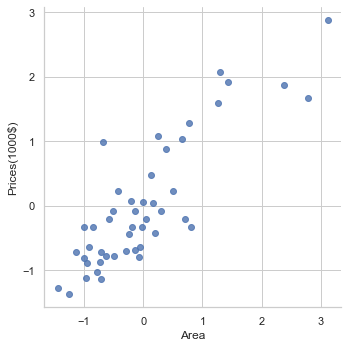

In [20]:
#do a scatter plot of the data
sns.set(style='whitegrid', context='notebook')
sns.lmplot('Area', 'Prices(1000$)', data=df, fit_reg=False)


In [5]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37, 3) (10, 3) (37,) (10,)


In [6]:
df.describe()

,X0,Area,Bedrooms,Prices(1000$)
count,47.0,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.0,3.779483e-17,2.746030e-16,-9.684924e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,1.0,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,1.0,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,1.0,3.376348e-01,1.090417e+00,3.521863e-01
max,1.0,3.117292e+00,2.404508e+00,2.874981e+00


## Hypothesis Function 
![alt text](hypothesis.jpg "Title")

In [7]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

## The Cost Function
![alt text](cost.jpg "Title")

In [8]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

## Batch Gradient Descent


![alt text](batch_gradient.jpg "Batch_Gradient")

In [9]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

## Training our data
We can see that after training our data it converges with a cost of 163

In [10]:
#calculate theta using batch gradient descent - training step 
theta = np.zeros(3)
theta[1]=6
theta[2]=8
theta, theta_list, cost_list = batch_gradient_descent(theta, X_train, y_train, 0.1, 10000,0.01)
itrs=len(cost_list)

[0. 6. 8.] cost is 85710.69545516712
[0.01094067 5.03127007 7.06856877] cost is 62800.3629274629
[0.01688593 4.21398021 6.26432534] cost is 46119.96687370327
[0.01899113 3.52539179 5.56891566] cost is 33967.2473822772
[0.01819579 2.94614438 4.96667914] cost is 25105.819621071707
[0.01526014 2.45975529 4.4442514 ] cost is 18637.594427697637
[0.01079579 2.05219324 3.99022564] cost is 13910.146201553374
[0.0052915  1.71151508 3.59486407] cost is 10449.453667618254
[-8.65295027e-04  1.42755631e+00  3.24985200e+00] cost is 7911.062411612957
[-0.00737048  1.19166745  2.94808815] cost is 6044.622596886679
[-0.01398823  0.99648936  2.68350605] cost is 4668.137937040162
[-0.02053842  0.8357619   2.45092171] cost is 3649.2658106926506
[-0.02688627  0.70416091  2.24590386] cost is 2891.737176996663
[-0.03293362  0.59715929  2.06466325] cost is 2325.494046706837
[-0.03861176  0.51090867  1.9039584 ] cost is 1899.5263965338806
[-0.0438755   0.44213864  1.76101514] cost is 1576.6693045144832
[-0.048

## Predicting for test data

In [11]:
def predict_batch(theta, x):
    '''
    This function calculates the predicted values

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the predicted values.

    '''
    #calculate the predicted values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(hypothesis(theta, x[i]))
    return y_pred

    



In [12]:
#calculate loss for test set
test_loss = cost_function(theta, X_test, y_test)
print("Test loss:", test_loss)


Test loss: 18.827601133597337


## J vs iterations

Text(0.5, 1.0, 'Error vs. Training Epoch')

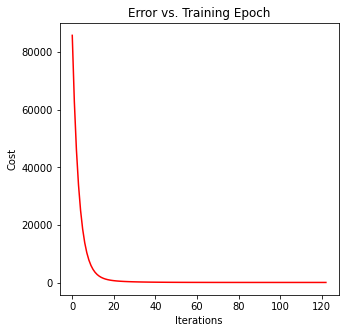

In [13]:

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Plot of hypothesis plane
Now since we have two features to show the learning model we will need to plot a plane in 3d which i have done by using two libraries "Plotly" and "Matplotlib" Respectively.

In [14]:
def plot_hypothesis_plane_plotly(theta):
    '''
    This function plots the hypothesis plane

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    
    Returns
    -------
    None

    '''
    #plot the hypothesis plane
    print(theta)
    X = df[['Area', 'Bedrooms']].values.reshape(-1,2)
    y = df['Prices(1000$)']
    x1=X[:,0]
    x2=X[:,1]
    z=y
    #calculate the range of the Area and Bedrooms and create a meshgrid
    x1_min, x1_max = x1.min() - 1 ,x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                            np.arange(x2_min, x2_max, 0.1))
    #calculate the z values for the meshgrid
    # get all the points in the meshgrid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    #get the predicted values for the meshgrid
    z_mesh = predict_batch(theta, mesh_points)

    #reshape the z_mesh to the same shape as xx and yy
    z_mesh = np.array(z_mesh)
    z_mesh = z_mesh.reshape(xx.shape)
    fig = px.scatter_3d(df, x='Area', y='Bedrooms', z='Prices(1000$)')
    fig.update_traces(marker=dict(size=5))
    fig.add_traces(go.Surface(x=np.arange(x1_min, x1_max, 0.1), y=np.arange(x2_min, x2_max, 0.1), z=z_mesh, name='pred_surface'))
    fig.show()


In [15]:
plot_hypothesis_plane_plotly(theta)

[-0.0268629   0.78800568  0.00507005]


In [16]:
#using matplotlib to plot the hypothesis plane
def plot_hypothesis_plane_matplot(theta):
    '''
    This function plots the hypothesis plane

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    
    Returns
    -------
    None

    '''
    #plot the hypothesis plane
    print(theta)
    X = df[['Area', 'Bedrooms']].values.reshape(-1,2)
    y = df['Prices(1000$)']
    x1=X[:,0]
    x2=X[:,1]
    z=y
    #calculate the range of the Area and Bedrooms and create a meshgrid
    x1_min, x1_max = x1.min() - 1 ,x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                            np.arange(x2_min, x2_max, 0.1))
    #calculate the z values for the meshgrid
    # get all the points in the meshgrid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    #get the predicted values for the meshgrid
    z_mesh = predict_batch(theta, mesh_points)

    # plot 3d scatter plot of mesh_points and z_mesh
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, z, c='r', marker='o')
    ax.scatter(mesh_points[:,0], mesh_points[:,1], z_mesh, c='b', marker='o', alpha=0.1)
    #tilt ax 
    # ax.view_init(-30, 200)
    ax.set_xlabel('Area')
    ax.set_ylabel('Bedrooms')
    ax.set_zlabel('Prices(1000$)')
    ax.set_title('3D Scatter Plot')
    

[-0.0268629   0.78800568  0.00507005]


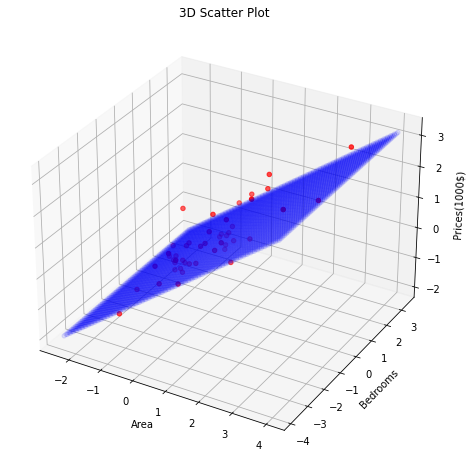

In [17]:
plot_hypothesis_plane_matplot(theta)

## Contour plot of J vs theta
Contour plot shows how our "theta" is converging to minimize our Cost Function.

In [18]:
def contour(alpha):
    #calculate theta using batch gradient descent - training step
    theta = np.zeros(3)
    theta[1]=6
    theta[2]=8
    theta, theta_list, cost_list = batch_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
    #print total no of iterations
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    #Plot a contour plot of the cost function vs theta1 and theta2
    #create a meshgrid of theta1 and theta2
    theta_list = np.array([list(t) for t in theta_list])
    print("THETA", theta_list)
    theta1_min, theta1_max = theta_list[:,1].min() - 1, theta_list[:,1].max() + 1
    theta2_min, theta2_max = theta_list[:,2].min() - 1, theta_list[:,2].max() + 1
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    
    Z = Z.reshape(theta1_grid.shape)
    print(Z)
    
    # plot contour plot wothout background color and line color based on z values
    ax.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
    # ax.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

    ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
    #put alpha value on the plot
    ax.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title('Contour Plot of Cost Function')
    #plot theta_list on the contour plot
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
        
    plt.show()


[0. 6. 8.] cost is 85710.69545516712
[0.01094067 5.03127007 7.06856877] cost is 62800.3629274629
[0.01688593 4.21398021 6.26432534] cost is 46119.96687370327
[0.01899113 3.52539179 5.56891566] cost is 33967.2473822772
[0.01819579 2.94614438 4.96667914] cost is 25105.819621071707
[0.01526014 2.45975529 4.4442514 ] cost is 18637.594427697637
[0.01079579 2.05219324 3.99022564] cost is 13910.146201553374
[0.0052915  1.71151508 3.59486407] cost is 10449.453667618254
[-8.65295027e-04  1.42755631e+00  3.24985200e+00] cost is 7911.062411612957
[-0.00737048  1.19166745  2.94808815] cost is 6044.622596886679
[-0.01398823  0.99648936  2.68350605] cost is 4668.137937040162
[-0.02053842  0.8357619   2.45092171] cost is 3649.2658106926506
[-0.02688627  0.70416091  2.24590386] cost is 2891.737176996663
[-0.03293362  0.59715929  2.06466325] cost is 2325.494046706837
[-0.03861176  0.51090867  1.9039584 ] cost is 1899.5263965338806
[-0.0438755   0.44213864  1.76101514] cost is 1576.6693045144832
[-0.048

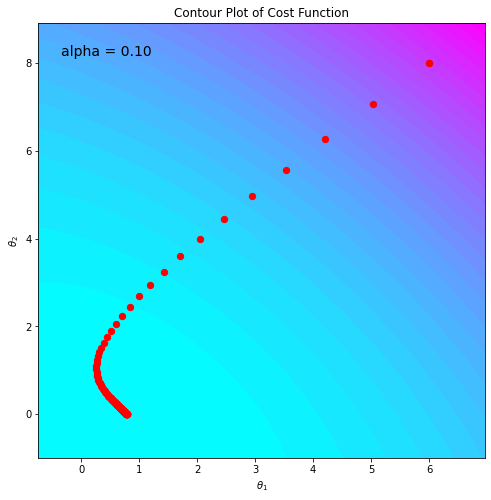

In [19]:
contour(0.1)